# **Exercise 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
exe_dir = "/home/aswathy/DATA_ANALYSIS/datalab/code"
output_dir = "/home/aswathy/DATA_ANALYSIS/datalab/solutions"

# **Task 1**  
Plot various realisations of signal plus noise. Use different signal amplitudes with generate_source until you can not distinguish the signal because it is too faint.

In [5]:
"""
Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>]
                          [-a <float>] [-r <int>]
  -o, --output=<file>       output file
  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
  -h, --help                print this help and exit
"""      

def generate_source(outputFile=None, sigma=0, f=10, A=1, delta_T=None, N=10000, phi=0, r=0):
    if delta_T == None : 
        delta_T = 1/N
           
    outputPath = os.path.join(output_dir, outputFile) # output_dir + "/" + "myfilename.csv"
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{exe_path} -o {outputFile} -s {sigma} -d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return outputFile

In [8]:
def plot_data(filename, title=None):       
    data = np.loadtxt(filename)
    plt.plot(data[:,0],data[:,1])
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    if (title):
        plt.title(title, fontsize=15)
    plt.savefig(filename.replace('.csv', '.jpg'))
    plt.show()
    plt.close()

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_01.csv -s 0.0 -d 0.0001 -N 10000 -f 40 -p 0 -a 1 -r 0


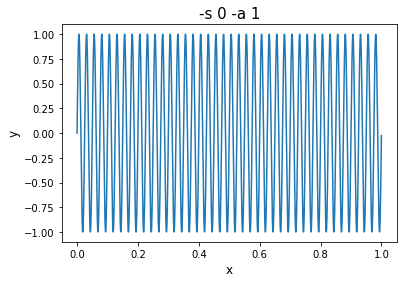

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_02.csv -s 0.5 -d 0.0001 -N 10000 -f 40 -p 0 -a 1 -r 0


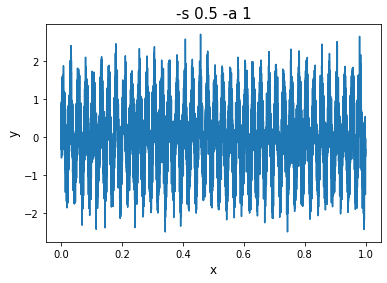

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_03.csv -s 5 -d 0.0001 -N 10000 -f 40 -p 0 -a 1 -r 0


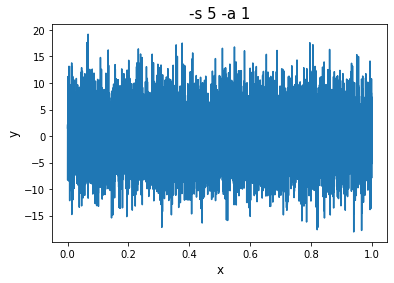

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_04.csv -s 10 -d 0.0001 -N 10000 -f 40 -p 0 -a 1 -r 0


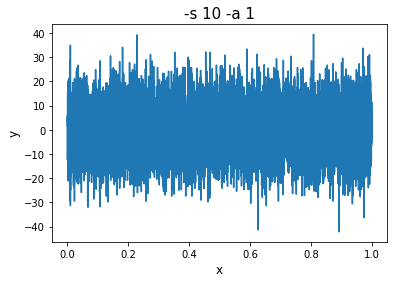

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_05.csv -s 10 -d 0.0001 -N 10000 -f 40 -p 0 -a 0 -r 0


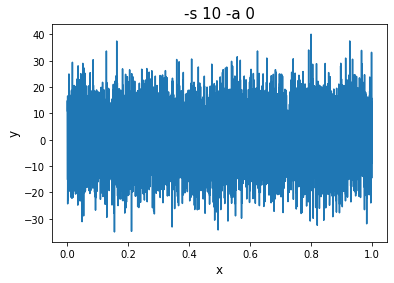

In [11]:
data_set = {
    1: {
        'sigma': 0.0,
        'A': 1,
        'f': 40,
        'delta_T': 0.0001,
        'filename': "data_01.csv",
        'title': "-s 0 -a 1",
    },
    2: {
        'sigma': 0.5,
        'A': 1,
        'f': 40,
        'delta_T': 0.0001,
        'filename': "data_02.csv",
        'title': "-s 0.5 -a 1",
    },
    3: {
        'sigma': 5,
        'A': 1,
        'f': 40,
        'delta_T': 0.0001,
        'filename': "data_03.csv",
        'title': "-s 5 -a 1",
    },
    4: {
        'sigma': 10,
        'A': 1,
        'f': 40,
        'delta_T': 0.0001,
        'filename': "data_04.csv",
        'title': "-s 10 -a 1",
    },
    5 : {
        'sigma': 10,
        'A': 0,
        'f': 40,
        'delta_T': 0.0001,
        'filename': "data_05.csv",
        'title': "-s 10 -a 0",
    }
}

for key, value in data_set.items():
    generate_source(value.get('filename'), sigma=value.get('sigma'), A=value.get('A'), f=value.get('f'), delta_T=value.get('delta_T'))
    plot_data(value.get('filename'), title=value.get('title'))

# **Task 2**
Learn to use prober, our small black box program computing a scalar result based upon input
time series and parameter point (f, φ).

In [14]:
"""
Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
  -i, --input=<file>        input file
  -o, --output=<file>       output file
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -h, --help                print this help and exit
  -t, --templatebank=<file> template bank file
  -m, --method=<int>        select method to analyze signal 1, 2 or 3
"""

def prober(inputFile, f=0, outputFile=None, phi=0, template=None, mod=0):
    
    exe_path = os.path.join(exe_dir, 'prober')
    cmd_str = f"{exe_path} -i {output_dir}/{inputFile} -o {output_dir}/{outputFile} -m {mod}"
    if template:
        cmd_str += f" -t {output_dir}/{template} "
    else:
        cmd_str += f" -f {f} -p {phi}"
        
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    
    return

In [15]:
prober("data_01.csv", f=10, mod=1)

The process has an output: 10 0 5.14506e-10



# **Task 3**
Learn how prober results change, varying the parameters of an injected signal while probing
the same parameter point

In [16]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=1)

The process has an output: 10 0 5.14506e-10

The process has an output: 10 0 -0.0053298

The process has an output: 10 0 0.0113055

The process has an output: 10 0 0.0103466

The process has an output: 10 0 -0.0118771



In [17]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, mod=2)

The process has an output: 10 0 0.999998

The process has an output: 10 0 1.25941

The process has an output: 10 0 26.218

The process has an output: 10 0 101.52

The process has an output: 10 0 96.7142



# **Task 4**
Plot/document result findings: how large may the mismatch between injection and probe
parameter may become? What happens with weak signals (small amplitude)?

In [18]:
#creating a template_bank 
n = 50
freq = np.linspace(0.01, 100.0, n)
with open("temp_bank", "w") as file:
    for i in range(n):
        file.write("{0} {1}\n".format(freq[i],0))

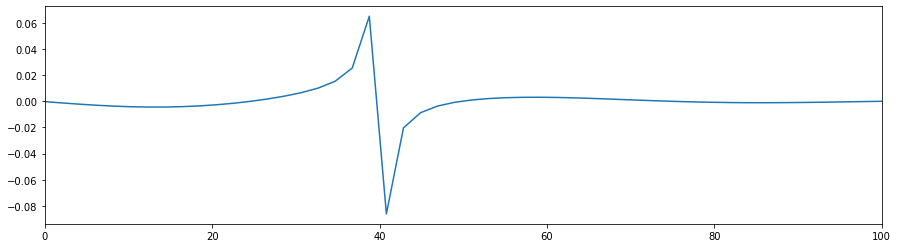

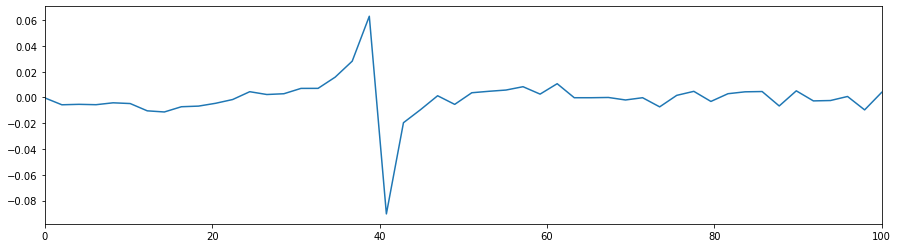

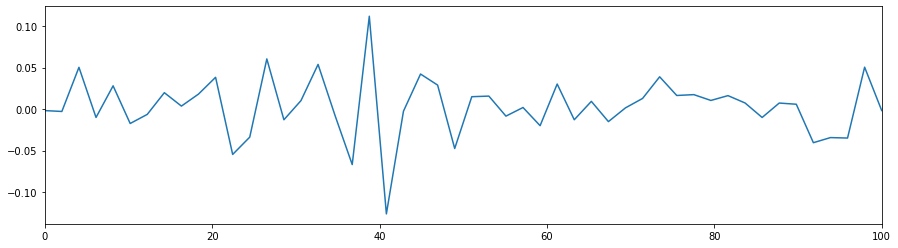

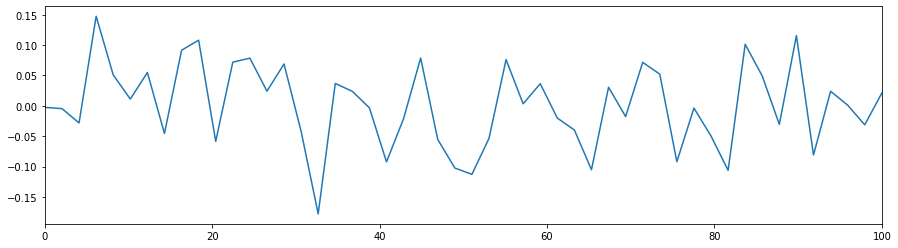

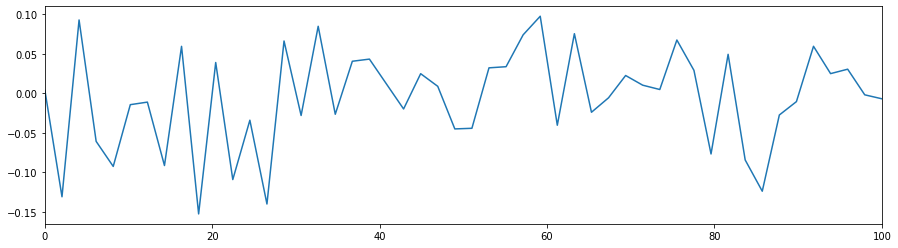

In [19]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}", template="temp_bank", mod=1)
    results_file = np.loadtxt(f"results_{i}")
    plt.figure(figsize=(15,4))
    plt.xlim([0.0,100.0])
    plt.plot(results_file[:,0],results_file[:,2])

#prober("data_01.csv", f=10, outputFile="results", template="temp_bank", mod=1)
#results_file = np.loadtxt(f"results_{i}")
#plt.figure(figsize=(15,4))
#plt.plot(results_file[:,0],results_file[:,2])

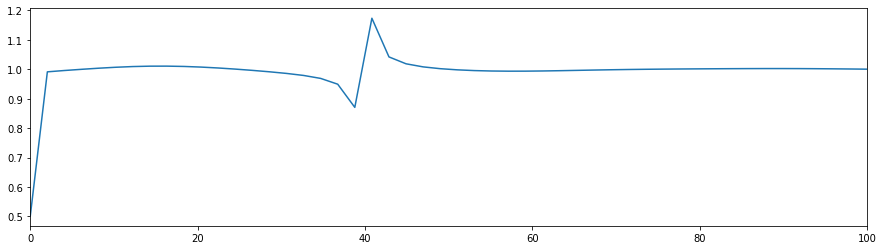

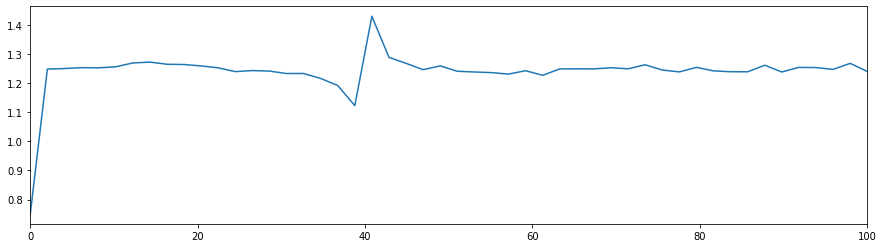

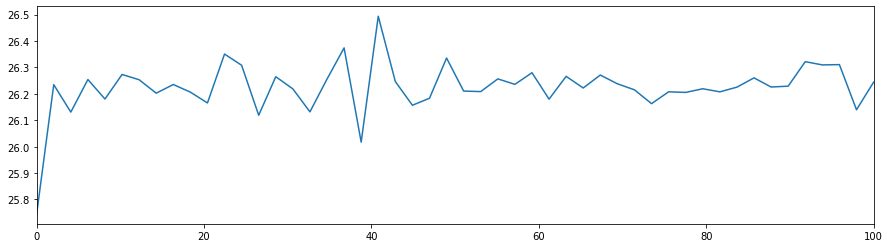

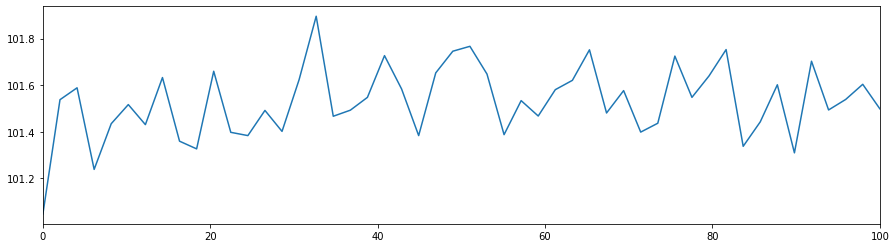

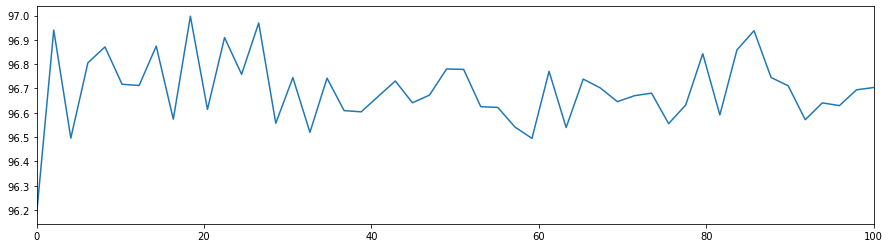

In [20]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}", template="temp_bank", mod=2)
    results_file = np.loadtxt(f"results_{i}")
    plt.figure(figsize=(15,4))
    plt.xlim([0.0,100.0])
    plt.plot(results_file[:,0],results_file[:,2])

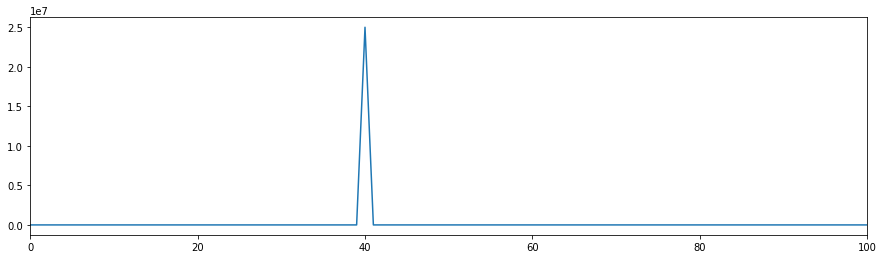

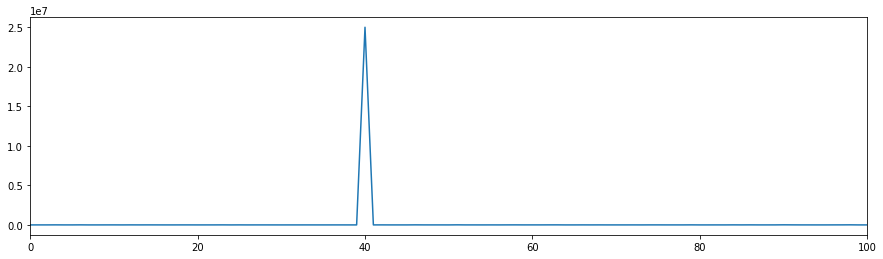

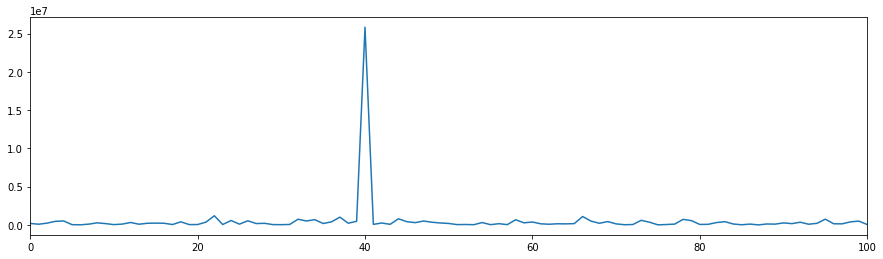

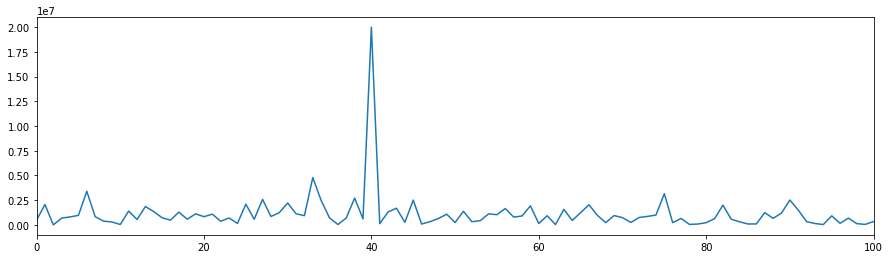

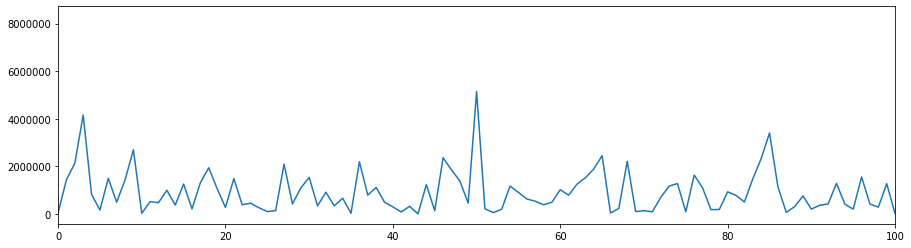

In [21]:
for i in range(1,6):
    prober(f"data_0{i}.csv", f=10, outputFile=f"results_{i}", template="temp_bank", mod=3)
    results_file = np.loadtxt(f"results_{i}")
    plt.figure(figsize=(15,4))
    plt.xlim([0.0,100.0])
    plt.plot(results_file[:,0],results_file[:,2])

# **Task 5**
Develop an strategy to find signal with prober if the signal parameters (A, f, φ) are unknown.

In [22]:
generate_source("data_07.csv", sigma=0, r=1)

/home/aswathy/DATA_ANALYSIS/datalab/code/generate_source -o data_07.csv -s 0 -d 0.0001 -N 10000 -f 10 -p 0 -a 1 -r 1
The process has an output: 620.152434
3.896294



'data_07.csv'

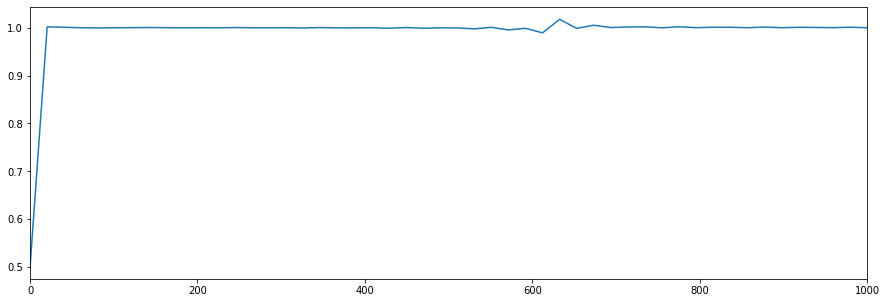

In [23]:
n = 50
freq = np.linspace(0.01, 1000.0, n)
with open("temp_bank1", "w") as file:
    for i in range(n):
        file.write("{0} {1}\n".format(freq[i],0))
        
prober("data_07.csv", outputFile="results1", template="temp_bank1", mod=2)

results_file = np.loadtxt("results1")
plt.figure(figsize=(15,5))
plt.plot(results_file[:,0],results_file[:,2])
plt.xlim([0.0,1000.0])
plt.savefig("data_07.jpg")
plt.show()
plt.close()

In [24]:
nfrq = 300
nphi = 50
freq = np.linspace(0.01, 100.0, nfrq)
phi = np.linspace(0, np.pi, nphi)

with open("temp_bank2", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(freq[i], phi[j]))

prober("data_01.csv", outputFile="results_1", template="temp_bank2", mod=1)
results_file = np.loadtxt("results_1")
print(results_file)

#plt.figure(figsize=(15,5))
#plt.plot(results_file[:,0],results_file[:,2])


[[ 1.00000e-02  0.00000e+00 -2.49822e-04]
 [ 1.00000e-02  6.41141e-02 -2.48807e-04]
 [ 1.00000e-02  1.28228e-01 -2.46766e-04]
 ...
 [ 1.00000e+02  3.01336e+00 -2.00917e-10]
 [ 1.00000e+02  3.07748e+00 -7.00568e-11]
 [ 1.00000e+02  3.14159e+00 -1.48171e-09]]


In [25]:
print(results_file.shape)

(15000, 3)
